In [1]:
import scipy.io as sio
from scipy.io import readsav
import numpy as np
import pandas as pd

This convert the .sav files into .txt files

In [2]:
# import os
# from scipy.io import readsav
# sav_directory = './sav_files'
# txt_directory = './txt_files'
# if not os.path.exists(txt_directory):
#     os.makedirs(txt_directory)
# for filename in os.listdir(sav_directory):
#     if filename.endswith(".sav"):
#         sav_path = os.path.join(sav_directory, filename)
#         data = readsav(sav_path)
#         data_str = str(data)
#         txt_path = os.path.join(txt_directory, filename.replace('.sav', '.txt'))
#         with open(txt_path, 'w') as txt_file:
#             txt_file.write(data_str)
#         print(f'Archivo {txt_path} creado.')

This gives me the name of all the files in the folder sav_files into a list

In [3]:
import os
directory = './sav_files'
sav_files_directory_ls = []
sav_files_ls = [file for file in os.listdir(directory) if file.endswith('.sav')]
for file in sav_files_ls:
    sav_files_directory_ls.append(os.path.join(directory, file))

This gives me the keys of each dictionary saved on each element of the sav_files_directory_ls list

In [4]:
for file in sav_files_directory_ls:
    print(file)
    print(readsav(file).keys())
    print(len(readsav(file).keys()))
    print("#######################")
    "1090904018_950to1050.sav"

./sav_files\1090904016_950to1050.sav
dict_keys(['shot', 'ta', 'tb', 'x', 'x_lim', 'x_sep', 'p_wall', 'mu', 't_i', 't_e', 'n_e', 'vx', 'vx1', 'vx2', 'lc', 'd_pipe', 'gammai', 'xh2', 'nh2', 'gammaxh2', 'th2', 'qxh2_total', 'nhp', 'thp', 'sh', 'sp', 'xh', 'nh', 'gammaxh', 'th', 'qxh_total', 'nethsource', 'sion', 'qh_total', 'sidewallh', 'lyman', 'balmer', 'gammahlim', 'pih_xx', 'pih_yy', 'pih_zz', 'rxhcx', 'rxh2_h', 'rxp_h', 'rxw_h', 'ehcx', 'eh2_h', 'ep_h', 'ew_h', 'epara_perph_h', 'sourceh', 'srecomb', 'l_ne', 'l_te', 'l_nh', 'd_eff', 'sep_rmid'])
57
#######################
./sav_files\1090904016_950to1050_towall.sav
dict_keys(['shot', 'ta', 'tb', 'x', 'x_lim', 'x_sep', 'p_wall', 'mu', 't_i', 't_e', 'n_e', 'vx', 'vx1', 'vx2', 'lc', 'd_pipe', 'gammai', 'xh2', 'nh2', 'gammaxh2', 'th2', 'qxh2_total', 'nhp', 'thp', 'sh', 'sp', 'xh', 'nh', 'gammaxh', 'th', 'qxh_total', 'nethsource', 'sion', 'qh_total', 'sidewallh', 'lyman', 'balmer', 'gammahlim', 'pih_xx', 'pih_yy', 'pih_zz', 'rxhcx', 'rxh2_

# Leyendo txt_file de kn1d_loop_test.py

In [87]:
import glob

def read_txt_to_dict(filename):
    data = {}
    with open(filename, 'r') as file:
        for line in file:
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip()
                value = value.strip()
                # Convert the value to a list of floats or a single float
                if '[' in value:
                    value_list = [float(i) for i in value.strip('[]').split()]
                else:
                    value_list = float(value)
                data[key] = value_list
    return data

# Buscar todos los archivos que coincidan con el patrón 'txt_file_nvh_*'
pattern = 'txt_file_nvh_*'
file_list = glob.glob(pattern)

# Leer cada archivo y guardar los resultados en un diccionario
all_data = {}
for filename in file_list:
    all_data[filename] = read_txt_to_dict(filename)

In [88]:
execution_times = {filename: data['tiempo_ejecución'] for filename, data in all_data.items()}
print(execution_times)

{'txt_file_nvh_10_nvh2_10.txt': 217.7946581840515, 'txt_file_nvh_10_nvh2_15.txt': 271.6335771083832, 'txt_file_nvh_10_nvh2_20.txt': 341.80497002601624, 'txt_file_nvh_10_nvh2_25.txt': 44.81447172164917, 'txt_file_nvh_10_nvh2_30.txt': 41.72659969329834, 'txt_file_nvh_10_nvh2_35.txt': 46.16170883178711, 'txt_file_nvh_10_nvh2_40.txt': 76.70253682136536, 'txt_file_nvh_10_nvh2_45.txt': 104.29664397239685, 'txt_file_nvh_10_nvh2_50.txt': 141.44453883171082, 'txt_file_nvh_15_nvh2_10.txt': 178.16683149337769, 'txt_file_nvh_15_nvh2_15.txt': 272.21916222572327, 'txt_file_nvh_15_nvh2_20.txt': 339.2017648220062, 'txt_file_nvh_15_nvh2_25.txt': 44.51017427444458, 'txt_file_nvh_15_nvh2_30.txt': 41.71741580963135, 'txt_file_nvh_15_nvh2_35.txt': 45.347545862197876, 'txt_file_nvh_15_nvh2_40.txt': 73.19319128990173, 'txt_file_nvh_15_nvh2_45.txt': 99.55699968338013, 'txt_file_nvh_15_nvh2_50.txt': 129.76896452903748, 'txt_file_nvh_20_nvh2_10.txt': 183.21778917312622, 'txt_file_nvh_20_nvh2_15.txt': 270.971138

In [89]:
sorted_execution_times = dict(sorted(execution_times.items(), key=lambda item: item[1]))
sorted_execution_times

{'txt_file_nvh_40_nvh2_30.txt': 40.96890425682068,
 'txt_file_nvh_50_nvh2_30.txt': 41.23948550224304,
 'txt_file_nvh_35_nvh2_30.txt': 41.24300956726074,
 'txt_file_nvh_30_nvh2_30.txt': 41.31976795196533,
 'txt_file_nvh_45_nvh2_30.txt': 41.36738133430481,
 'txt_file_nvh_20_nvh2_30.txt': 41.43362379074097,
 'txt_file_nvh_25_nvh2_30.txt': 41.62228488922119,
 'txt_file_nvh_15_nvh2_30.txt': 41.71741580963135,
 'txt_file_nvh_10_nvh2_30.txt': 41.72659969329834,
 'txt_file_nvh_15_nvh2_25.txt': 44.51017427444458,
 'txt_file_nvh_50_nvh2_25.txt': 44.651193380355835,
 'txt_file_nvh_10_nvh2_25.txt': 44.81447172164917,
 'txt_file_nvh_35_nvh2_25.txt': 45.140313386917114,
 'txt_file_nvh_25_nvh2_35.txt': 45.15974307060242,
 'txt_file_nvh_30_nvh2_25.txt': 45.268309116363525,
 'txt_file_nvh_15_nvh2_35.txt': 45.347545862197876,
 'txt_file_nvh_45_nvh2_25.txt': 45.37412095069885,
 'txt_file_nvh_20_nvh2_35.txt': 45.46342158317566,
 'txt_file_nvh_40_nvh2_25.txt': 45.562140226364136,
 'txt_file_nvh_35_nvh2_35.

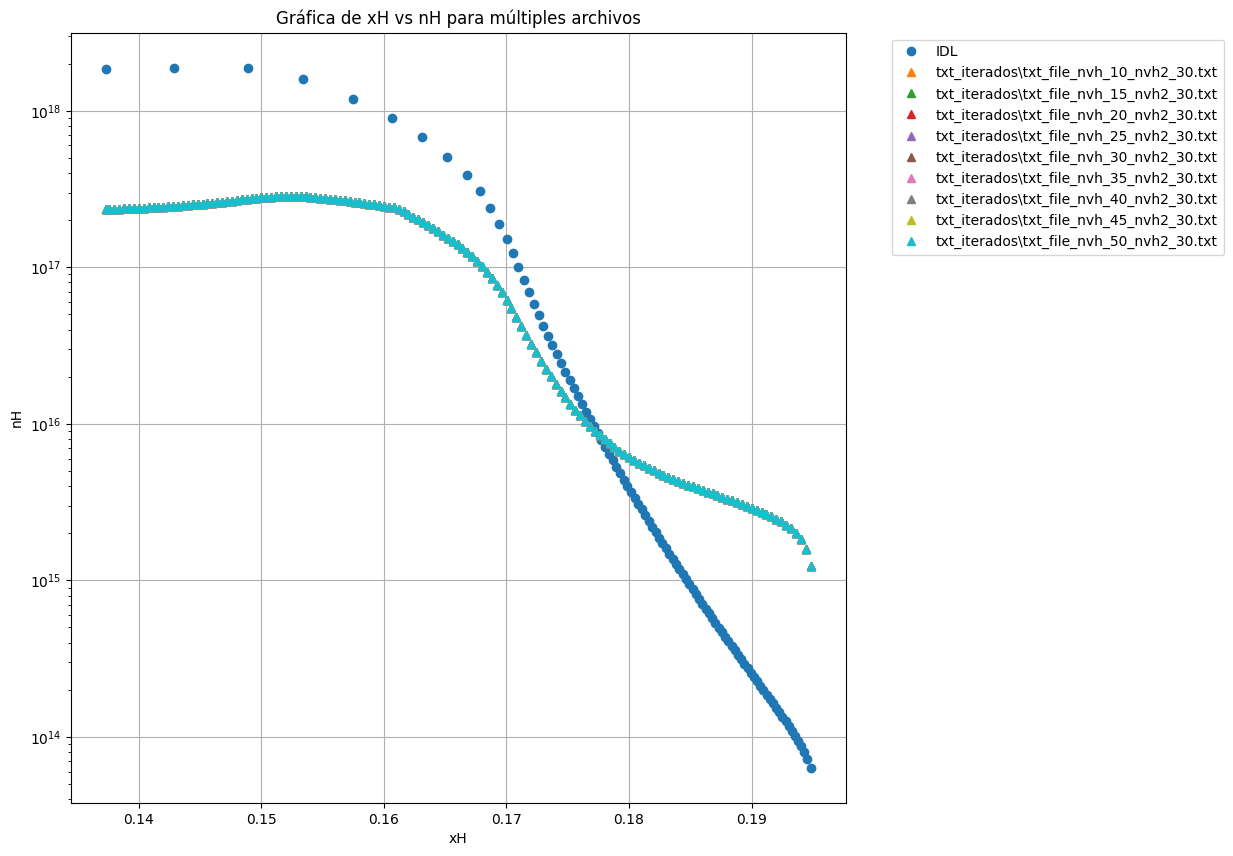

In [133]:
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import readsav
filename_sav = readsav('1090904024_950to1050.sav')

def read_variable_from_txt(filename, variable_name):
    with open(filename, 'r') as file:
        content = file.read()
    
    # Usar expresión regular para encontrar y extraer los valores de la variable
    pattern = rf"{variable_name}:\s*\[([^\]]+)\]"
    match = re.search(pattern, content)
    if match:
        values_str = match.group(1)
        values_list = [float(val) for val in values_str.split()]
        return values_list
    else:
        return None

# Buscar todos los archivos que coincidan con el patrón 'txt_file_nvh_*'
# pattern = 'txt_file_nvh_40_nvh2_30*'
pattern = 'txt_iterados/txt_file_nvh_*nvh2_30*'
file_list = glob.glob(pattern)

fig = plt.figure(figsize=(10,10))
plt.plot(filename_sav['xh'],filename_sav['nh'],'o',label='IDL')

for filename in file_list:
    xH = read_variable_from_txt(filename, 'xH')
    nH = read_variable_from_txt(filename, 'nH')
    
    if xH is not None and nH is not None:
        plt.plot(xH, nH,'^' ,label=filename)

# Configurar la gráfica
plt.xlabel('xH')
plt.yscale('log')
plt.ylabel('nH')
# plt.xticks(filename_sav['xh'],rotation=90)
# plt.yticks(nH)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH vs nH para múltiples archivos')
plt.grid(True)
plt.show()


In [140]:
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import readsav
filename = readsav('1090904024_950to1050.sav')

def read_variable_from_txt(filename, variable_name):
    with open(filename, 'r') as file:
        content = file.read()
    
    # Usar expresión regular para encontrar y extraer los valores de la variable
    pattern = rf"{variable_name}:\s*\[([^\]]+)\]"
    match = re.search(pattern, content)
    if match:
        values_str = match.group(1)
        values_list = [float(val) for val in values_str.split()]
        return values_list
    else:
        return None

# Buscar todos los archivos que coincidan con el patrón 'txt_file_nvh_*'
# txt_iterados\txt_file_nvh_10_nvh2_10.txt
pattern = 'txt_iterados/txt_file_nvh_*nvh2_20*'
file_list = glob.glob(pattern)

# fig = plt.figure(figsize=(10,10))
# plt.plot(filename['xh2'],filename['nh2'],'o',label='IDL')
# Leer los valores de xH y nH de cada archivo y graficarlos
for filename in file_list:
    xH2 = read_variable_from_txt(filename, 'xH2')
    nH2 = read_variable_from_txt(filename, 'nH2')
    # print(len(xH2),len(nH2))
    print(nH2[1])
    # print(f"{nH2[0]:.18e}")  # Muestra el número con 18 decimales en notación científica
    # print(f"{nH2[0]:.18f}")  # Muestra el número con 18 decimales en notación de punto flotante

    if xH2 is not None and nH2 is not None:
        # plt.plot(xH2, nH2,'--' ,label=filename)
        pass

# # Configurar la gráfica
# plt.xlabel('xH2')
# plt.yscale('log')
# plt.ylabel('nH2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Gráfica de xH2 vs nH2 para múltiples archivos')
# plt.show()


4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18


[9.98988006e+18, 9.37760296e+18, 7.16960211e+18, 5.19510221e+18, 3.38668706e+18, 1.91270626e+18, 9.73260654e+17, 4.83312089e+17, 2.37120013e+17, 1.17589289e+17, 5.98538724e+16, 3.17328776e+16, 1.76523457e+16, 1.04410396e+16, 6691361240000000.0]
[9.98988006e+18, 9.37760296e+18, 7.16960211e+18, 5.19510221e+18, 3.38668706e+18, 1.91270626e+18, 9.73260654e+17, 4.83312089e+17, 2.37120013e+17, 1.17589289e+17, 5.98538724e+16, 3.17328776e+16, 1.76523457e+16, 1.04410396e+16, 6691361240000000.0]
[9.98988006e+18, 9.37760296e+18, 7.16960211e+18, 5.19510221e+18, 3.38668706e+18, 1.91270626e+18, 9.73260654e+17, 4.83312089e+17, 2.37120013e+17, 1.17589289e+17, 5.98538724e+16, 3.17328776e+16, 1.76523457e+16, 1.04410396e+16, 6691361240000000.0]
[9.98988006e+18, 9.37760296e+18, 7.16960211e+18, 5.19510221e+18, 3.38668706e+18, 1.91270626e+18, 9.73260654e+17, 4.83312089e+17, 2.37120013e+17, 1.17589289e+17, 5.98538724e+16, 3.17328776e+16, 1.76523457e+16, 1.04410396e+16, 6691361240000000.0]
[9.98988006e+18, 9.3

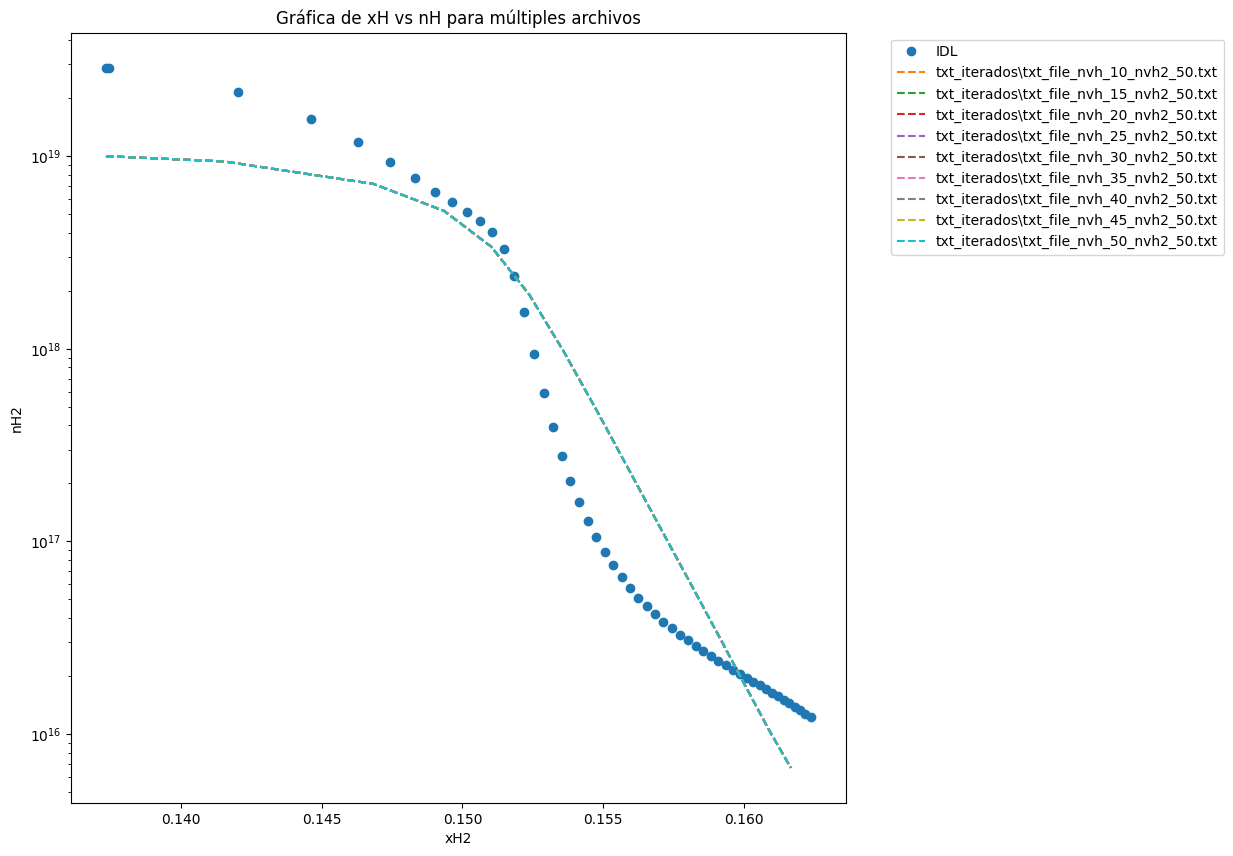

In [163]:
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import readsav

# Leer el archivo SAV
filename = readsav('1090904024_950to1050.sav')

def read_variable_from_txt(filepath, variable_name):
    with open(filepath, 'r') as file:
        content = file.read()
    
    # Usar expresión regular para encontrar y extraer los valores de la variable
    pattern = rf"{variable_name}:\s*\[([^\]]+)\]"
    match = re.search(pattern, content)
    if match:
        values_str = match.group(1)
        values_list = [float(val) for val in values_str.split()]
        return values_list
    else:
        return None

# Buscar todos los archivos que coincidan con el patrón 'txt_iterados/txt_file_nvh_*'
pattern = 'txt_iterados/txt_file_nvh_*nvh2_50*'
file_list = glob.glob(pattern)

fig = plt.figure(figsize=(10,10))
plt.plot(filename['xh2'], filename['nh2'], 'o', label='IDL')

# Leer los valores de xH y nH de cada archivo y graficarlos
for filepath in file_list:
    xH = read_variable_from_txt(filepath, 'xH2')
    nH = read_variable_from_txt(filepath, 'nH2')
    print(nH)
    # print(len(xH), len(nH))
    if xH is not None and nH is not None:
        plt.plot(xH, nH, '--', label=filepath)

# Configurar la gráfica
plt.xlabel('xH2')
plt.yscale('log')
plt.ylabel('nH2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH vs nH para múltiples archivos')
plt.show()


[6.34697782e+18, 6.16341235e+18, 5.07644835e+18, 3.56866372e+18, 2.10832655e+18, 1.06981967e+18, 5.15351774e+17, 2.53172407e+17, 1.29621028e+17, 6.72466307e+16]
[0.13734576, 0.14114884, 0.14714884, 0.15036417, 0.15257474, 0.15453031, 0.1564377, 0.15824785, 0.15983276, 0.16118402]
[6.34697782e+18, 6.16341235e+18, 5.07644835e+18, 3.56866372e+18, 2.10832655e+18, 1.06981967e+18, 5.15351774e+17, 2.53172407e+17, 1.29621028e+17, 6.72466307e+16]
[0.13734576, 0.14114884, 0.14714884, 0.15036417, 0.15257474, 0.15453031, 0.1564377, 0.15824785, 0.15983276, 0.16118402]
[6.34697782e+18, 6.16341235e+18, 5.07644835e+18, 3.56866372e+18, 2.10832655e+18, 1.06981967e+18, 5.15351774e+17, 2.53172407e+17, 1.29621028e+17, 6.72466307e+16]
[0.13734576, 0.14114884, 0.14714884, 0.15036417, 0.15257474, 0.15453031, 0.1564377, 0.15824785, 0.15983276, 0.16118402]
[6.34697782e+18, 6.16341235e+18, 5.07644835e+18, 3.56866372e+18, 2.10832655e+18, 1.06981967e+18, 5.15351774e+17, 2.53172407e+17, 1.29621028e+17, 6.72466307e+

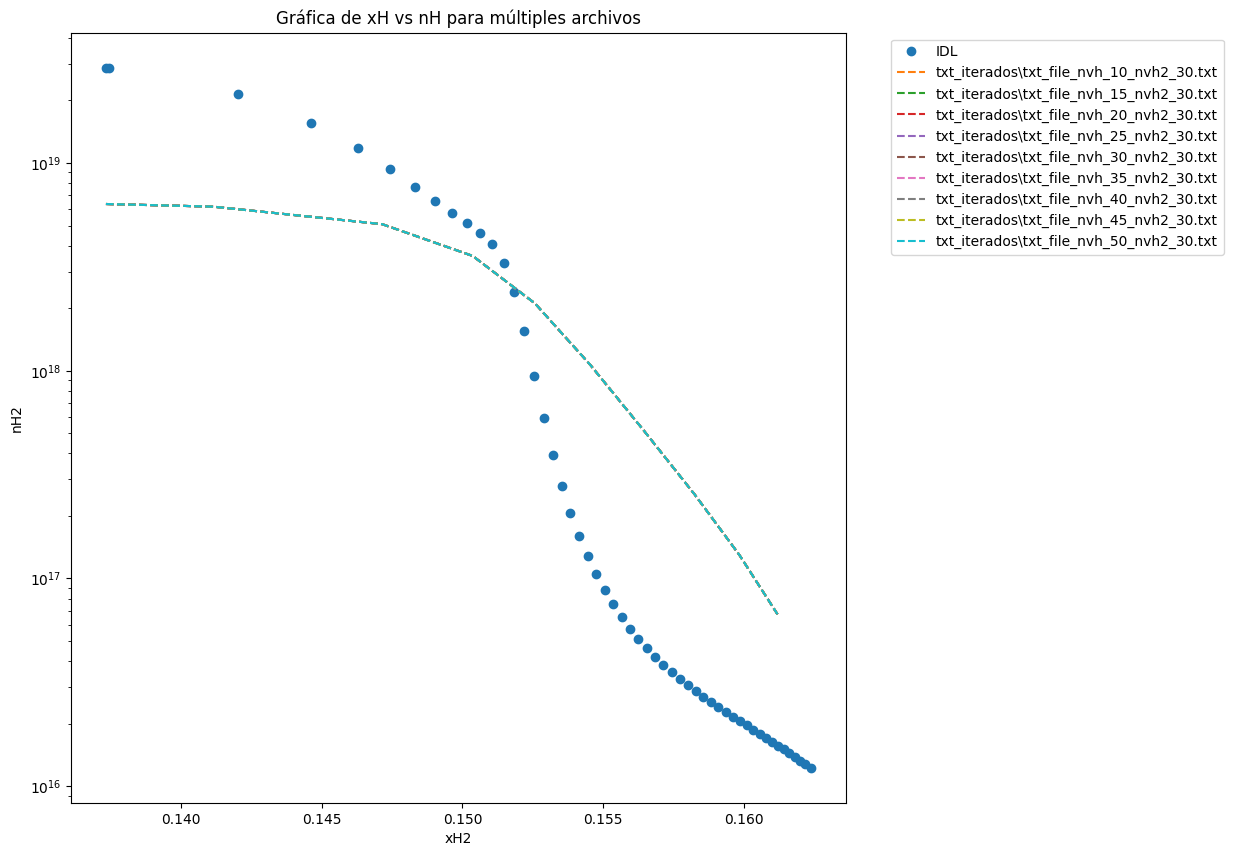

In [172]:
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import readsav

# Leer el archivo SAV
filename = readsav('1090904024_950to1050.sav')

def read_variable_from_txt(filepath, variable_name):
    with open(filepath, 'r') as file:
        content = file.read()
    
    # Usar expresión regular para encontrar y extraer los valores de la variable
    pattern = rf"{variable_name}:\s*\[([^\]]+)\]"
    match = re.search(pattern, content)
    if match:
        values_str = match.group(1)
        values_list = [float(val) for val in values_str.split()]
        return values_list
    else:
        return None

# Buscar todos los archivos que coincidan con el patrón 'txt_iterados/txt_file_nvh_*'
pattern = 'txt_iterados/txt_file_nvh_*nvh2_30*'
file_list = glob.glob(pattern)

fig = plt.figure(figsize=(10,10))
plt.plot(filename['xh2'], filename['nh2'], 'o', label='IDL')

# Leer los valores de xH y nH de cada archivo y graficarlos
for filepath in file_list:
    xH = read_variable_from_txt(filepath, 'xH2')
    nH = read_variable_from_txt(filepath, 'nH2')
    print(nH)
    print(xH)
    # print(len(xH), len(nH))
    if xH is not None and nH is not None:
        plt.plot(xH, nH, '--', label=filepath)

# Configurar la gráfica
plt.xlabel('xH2')
plt.yscale('log')
plt.ylabel('nH2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH vs nH para múltiples archivos')
plt.show()


In [ ]:
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import readsav
filename = readsav('1090904024_950to1050.sav')

def read_variable_from_txt(filename, variable_name):
    with open(filename, 'r') as file:
        content = file.read()
    
    # Usar expresión regular para encontrar y extraer los valores de la variable
    pattern = rf"{variable_name}:\s*\[([^\]]+)\]"
    match = re.search(pattern, content)
    if match:
        values_str = match.group(1)
        values_list = [float(val) for val in values_str.split()]
        return values_list
    else:
        return None

# Buscar todos los archivos que coincidan con el patrón 'txt_file_nvh_*'
# txt_iterados\txt_file_nvh_10_nvh2_10.txt
pattern = 'txt_iterados/txt_file_nvh_*nvh2_20*'
file_list = glob.glob(pattern)

# fig = plt.figure(figsize=(10,10))
# plt.plot(filename['xh2'],filename['nh2'],'o',label='IDL')
# Leer los valores de xH y nH de cada archivo y graficarlos
for filename in file_list:
    xH2 = read_variable_from_txt(filename, 'xH2')
    nH2 = read_variable_from_txt(filename, 'nH2')
    # print(len(xH2),len(nH2))
    print(nH2[1])
    # print(f"{nH2[0]:.18e}")  # Muestra el número con 18 decimales en notación científica
    # print(f"{nH2[0]:.18f}")  # Muestra el número con 18 decimales en notación de punto flotante

    if xH2 is not None and nH2 is not None:
        # plt.plot(xH2, nH2,'--' ,label=filename)
        pass

# # Configurar la gráfica
# plt.xlabel('xH2')
# plt.yscale('log')
# plt.ylabel('nH2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('Gráfica de xH2 vs nH2 para múltiples archivos')
# plt.show()


4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18
4.96363498e+18


# Leyendo txt_file de kn1d_test_varying_times_nh.py

145 97
145 97
145 97
145 97
145 97
145 97
145 97
145 97
145 97
145 97
145 97


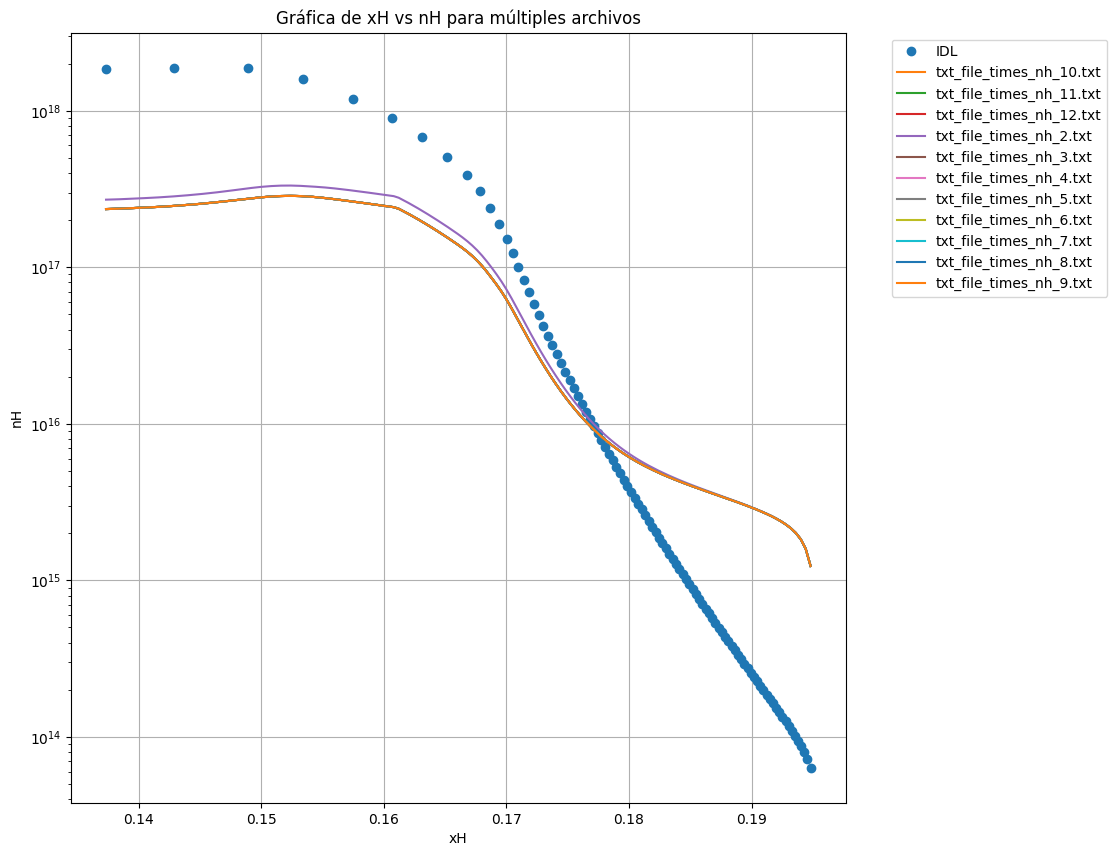

In [179]:
filename_sav = readsav('1090904024_950to1050.sav')
pattern = 'txt_file_times_nh_*.txt'
file_list = glob.glob(pattern)


fig = plt.figure(figsize=(10,10))
plt.plot(filename_sav['xh'],filename_sav['nh'],'o',label='IDL')

for filename in file_list[:]:
    xH = read_variable_from_txt(filename, 'xH')
    nH = read_variable_from_txt(filename, 'nH')
    print(len(xH),len(filename_sav['xh']))
    if xH is not None and nH is not None:
        # plt.plot(xH, nH,'^' ,label=filename)
        plt.plot(xH, nH,'-' ,label=filename)


# Configurar la gráfica
plt.xlabel('xH')
plt.yscale('log')
plt.ylabel('nH')
# plt.xticks(filename_sav['xh'],rotation=90)
# plt.yticks(nH)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH vs nH para múltiples archivos')
plt.grid(True)
plt.show()

10 97
10 97
10 97
10 97
10 97
10 97
10 97
10 97
10 97
10 97
10 97


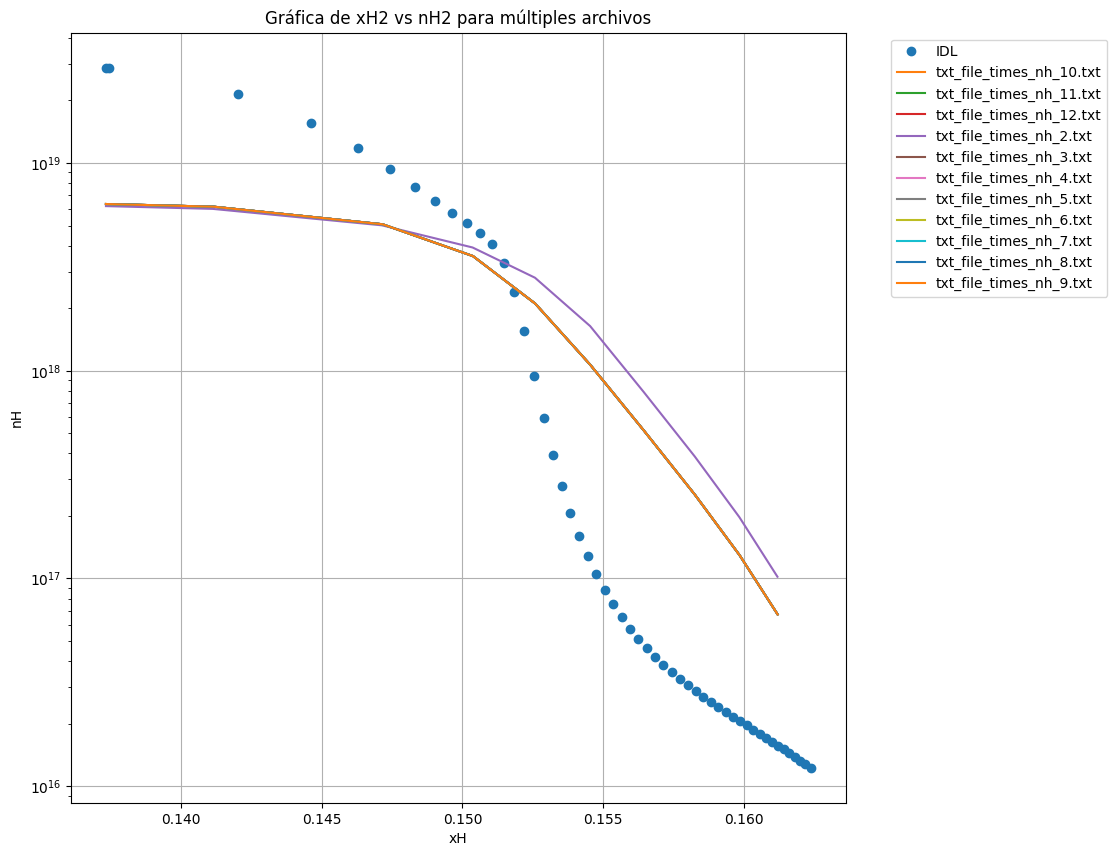

In [178]:
filename_sav = readsav('1090904024_950to1050.sav')
pattern = 'txt_file_times_nh_*.txt'
file_list = glob.glob(pattern)


fig = plt.figure(figsize=(10,10))
plt.plot(filename_sav['xh2'],filename_sav['nh2'],'o',label='IDL')

for filename in file_list[:]:
    xH = read_variable_from_txt(filename, 'xH2')
    nH = read_variable_from_txt(filename, 'nH2')
    print(len(xH),len(filename_sav['xh']))
    if xH is not None and nH is not None:
        # plt.plot(xH, nH,'^' ,label=filename)
        plt.plot(xH, nH,'-' ,label=filename)


# Configurar la gráfica
plt.xlabel('xH')
plt.yscale('log')
plt.ylabel('nH')
# plt.xticks(filename_sav['xh'],rotation=90)
# plt.yticks(nH)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH2 vs nH2 para múltiples archivos')
plt.grid(True)
plt.show()

# txt_interp_scalar

145 97
145 97


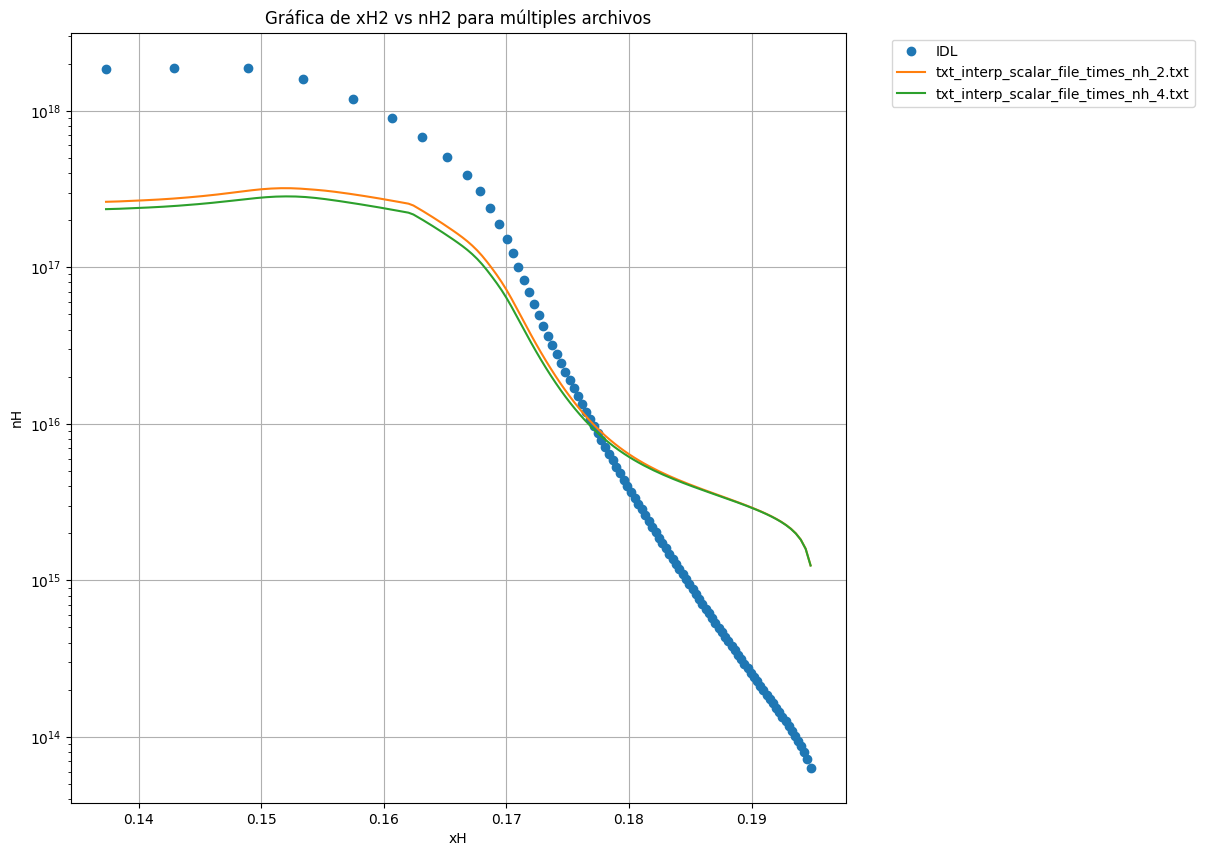

In [188]:
filename_sav = readsav('1090904024_950to1050.sav')
pattern = 'txt_interp_scalar_file_times_nh*.txt'
file_list = glob.glob(pattern)


fig = plt.figure(figsize=(10,10))
plt.plot(filename_sav['xh'],filename_sav['nh'],'o',label='IDL')

for filename in file_list[:]:
    xH = read_variable_from_txt(filename, 'xH')
    nH = read_variable_from_txt(filename, 'nH')
    print(len(xH),len(filename_sav['xh']))
    if xH is not None and nH is not None:
        # plt.plot(xH, nH,'^' ,label=filename)
        plt.plot(xH, nH,'-' ,label=filename)


# Configurar la gráfica
plt.xlabel('xH')
plt.yscale('log')
plt.ylabel('nH')
# plt.xticks(filename_sav['xh'],rotation=90)
# plt.yticks(nH)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH2 vs nH2 para múltiples archivos')
plt.grid(True)
plt.show()

11 97
11 97


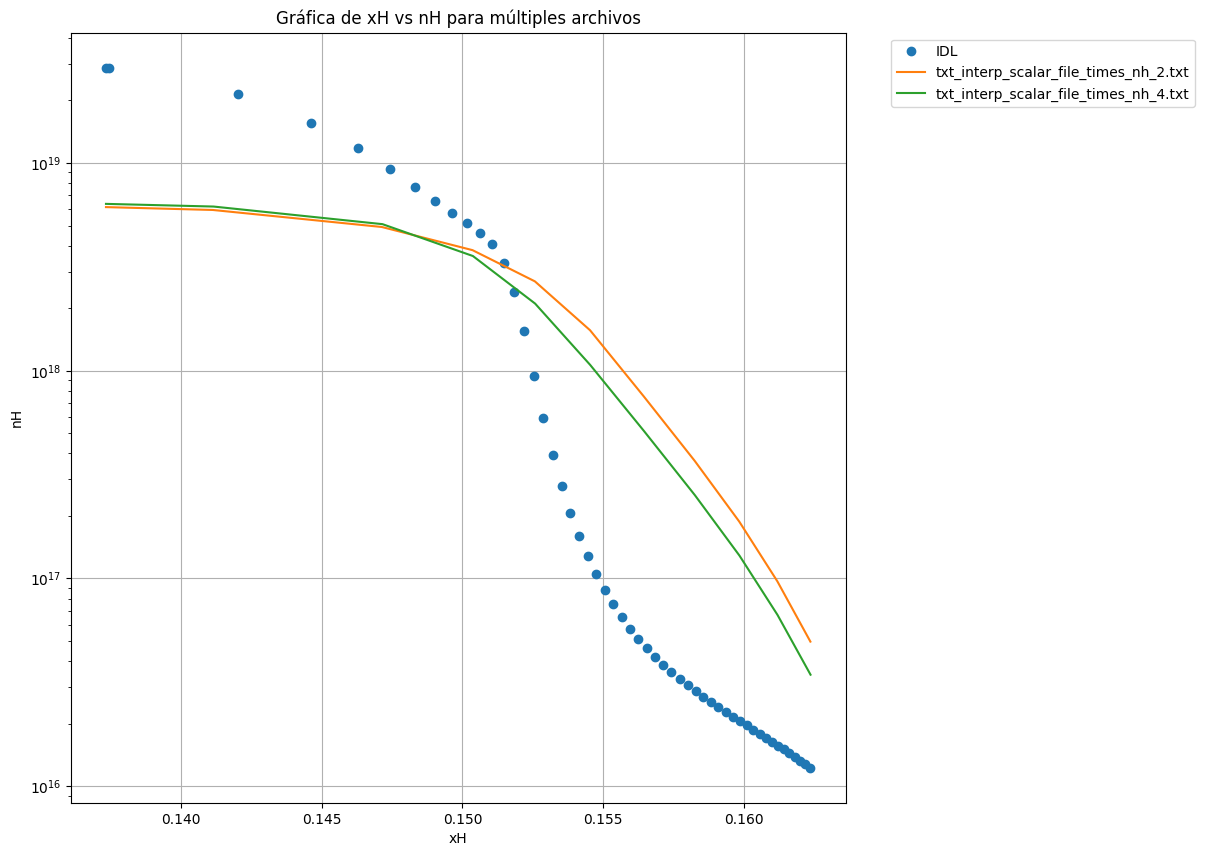

In [185]:
filename_sav = readsav('1090904024_950to1050.sav')
pattern = 'txt_interp_scalar_file_times_nh*.txt'
file_list = glob.glob(pattern)


fig = plt.figure(figsize=(10,10))
plt.plot(filename_sav['xh2'],filename_sav['nh2'],'o',label='IDL')

for filename in file_list[:]:
    xH = read_variable_from_txt(filename, 'xH2')
    nH = read_variable_from_txt(filename, 'nH2')
    print(len(xH),len(filename_sav['xh']))
    if xH is not None and nH is not None:
        # plt.plot(xH, nH,'^' ,label=filename)
        plt.plot(xH, nH,'-' ,label=filename)


# Configurar la gráfica
plt.xlabel('xH')
plt.yscale('log')
plt.ylabel('nH')
# plt.xticks(filename_sav['xh'],rotation=90)
# plt.yticks(nH)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gráfica de xH vs nH para múltiples archivos')
plt.grid(True)
plt.show()

# variables_KN1D.txt reading

In [192]:
# Crear un diccionario para almacenar las variables
variables = {}

# Abrir y leer el archivo .txt línea por línea
with open('variables_KN1D.txt', 'r') as file:
    for line in file:
        # Dividir la línea en nombre de la variable y su valor
        if ': ' in line:
            name, value = line.split(': ', 1)
            # Evaluar el valor para convertirlo a su tipo original
            try:
                variables[name] = eval(value.split(',')[0])  # evalúa solo el valor antes de la primera coma
            except:
                variables[name] = value.strip()  # En caso de que eval falle, guarda el valor como string

# Ahora las variables están almacenadas en el diccionario 'variables'
# Si deseas, puedes asignarlas como variables normales

# Asignar cada valor a una variable con el mismo nombre
for name, value in variables.items():
    globals()[name] = value  # Esto crea variables globales con los nombres y valores del archivo

# Ejemplo de cómo verificar las variables
print(x)  # Esto debería imprimir la variable 'x' leída del archivo
print(xlimiter)  # Y así sucesivamente


[0.13734576 0.13784188 0.13833801 0.13883413 0.13933025 0.13982639
0.15163224935531616


In [233]:
import re
import numpy as np

def read_variable_from_txt(filepath, variable_name):
    with open(filepath, 'r') as file:
        content = file.read()
    
    # Primero, buscar si el valor es una lista (dentro de corchetes)
    pattern_list = rf"{variable_name}:\s*\[([^\]]+)\]"
    match_list = re.search(pattern_list, content)
    
    if match_list:
        # Extraer los valores como una lista de cadenas y convertirlas a floats
        values_str = match_list.group(1)
        values_list = [float(val) for val in values_str.split()]
        return np.array(values_list, dtype=np.float32)
    
    # Si no es una lista, buscar si es un valor único
    pattern_single = rf"{variable_name}:\s*([-+]?[0-9]*\.?[0-9]+(?:[eE][-+]?[0-9]+)?)"
    match_single = re.search(pattern_single, content)
    
    if match_single:
        # Convertir el valor único a float y luego a numpy.float32 o int
        value = float(match_single.group(1))
        if value.is_integer():
            return np.int32(value)
        return np.float32(value)
    
    return None

# Ejemplo de uso
filepath = 'variables_KN1D.txt'
x = read_variable_from_txt(filepath, 'x')

In [234]:
variables = [
    'x', 'xlimiter', 'xsep', 'GaugeH2', 'mu', 'Ti', 'Te', 'n', 'vxi', 'LC', 'PipeDia', 
    'nv_h2', 'nv_h', 'truncate', 'refine', 'File', 'NewFile', 'ReadInput', 'error', 
    'compute_errors', 'plot', 'debug', 'debrief', 'pause', 'Hplot', 'Hdebug', 'Hdebrief', 
    'Hpause', 'H2plot', 'H2debug', 'H2debrief', 'H2pause', 'adas_rec_h1s', 'adas_ion_h0', 
    'adas_qcx_h0'
]
for var in variables:
    globals()[var] = read_variable_from_txt(filepath, var)

In [241]:
nv_h2,Ti

(np.int32(40),
 array([  9.346788 ,   9.346788 ,   9.346788 ,   9.346788 ,   9.346788 ,
          9.346788 ,   9.346788 ,   9.346788 ,   9.346788 ,   9.346788 ,
          9.346788 ,   9.346788 ,   9.346788 ,   9.346788 ,   9.346788 ,
          9.37206  ,   9.4004345,   9.624148 ,   9.875762 ,  10.370568 ,
         10.90517  ,  11.469928 ,  12.040251 ,  12.702477 ,  13.383801 ,
         14.081838 ,  14.783736 ,  15.42812  ,  16.057816 ,  16.584644 ,
         17.08268  ,  17.453669 ,  17.78577  ,  17.957846 ,  18.076569 ,
         18.108105 ,  18.108105 ,  18.108105 ,  18.108105 ,  18.108105 ,
         18.108105 ,  18.125433 ,  18.150639 ,  18.26326  ,  18.418575 ,
         18.679922 ,  18.996798 ,  19.410242 ,  19.877872 ,  20.40856  ,
         20.97709  ,  21.565647 ,  22.16706  ,  22.764914 ,  23.360361 ,
         23.9812   ,  24.620579 ,  25.392778 ,  26.268322 ,  27.474697 ,
         28.955278 ,  30.725021 ,  32.749928 ,  35.23519  ,  38.153008 ,
         41.74346  ,  46.006775 ,  5

In [240]:
GaugeH2, xsep

(np.float32(1.7428448), np.float32(0.17134577))